<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Cross_Val_Min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return loader

In [9]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

In [14]:
car1 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID01/')
dmg1 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID01/')

In [15]:
id1b = get_features(vgg,car1)
id1v = get_features(vgg,dmg1)

100%|██████████| 1/1 [00:03<00:00,  3.57s/it]


In [16]:
ldmg1 = get_euclidean(id1b,id1v)
ldmg1

[5.305085182189941, 1.2369061708450317, 8.860304832458496, 1.4820032119750977]

In [17]:
car2 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID02/')
dmg2 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID02/')

In [18]:
id2b = get_features(vgg,car2)
id2v = get_features(vgg,dmg2)

100%|██████████| 1/1 [00:03<00:00,  3.70s/it]


In [19]:
ldmg2 = get_euclidean(id2b,id2v)
ldmg2

[2.2765514850616455,
 0.7315961718559265,
 2.1428089141845703,
 12.650805473327637]

In [20]:
car3 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID03/')
dmg3 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID03/')

In [21]:
id3b = get_features(vgg,car3)
id3v = get_features(vgg,dmg3)

100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


In [22]:
ldmg3 = get_euclidean(id3b,id3v)
ldmg3

[6.874865531921387, 0.5150604248046875, 2.4770703315734863, 0.0]

In [23]:
car4 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID04/')
dmg4 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID04/')

In [24]:
id4b = get_features(vgg,car4)
id4v = get_features(vgg,dmg4)

100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


In [25]:
ldmg4 = get_euclidean(id4b,id4v)
ldmg4

[10.91299819946289,
 2.2293736934661865,
 27.077898025512695,
 0.14396598935127258]

In [26]:
car5 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID05/')
dmg5 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID05/')

In [27]:
id5b = get_features(vgg,car5)
id5v = get_features(vgg,dmg5)

100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


In [28]:
ldmg5 = get_euclidean(id5b,id5v)
ldmg5

[14.46715259552002, 0.492559552192688, 1.4209824800491333, 12.01363754272461]

In [29]:
car7 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID07/')
dmg7 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID07/')

In [30]:
id7b = get_features(vgg,car7)
id7v = get_features(vgg,dmg7)

100%|██████████| 1/1 [00:04<00:00,  4.30s/it]


In [31]:
ldmg7 = get_euclidean(id7b,id7v)
ldmg7

[9.235045433044434, 6.485491752624512, 10.339686393737793, 0.2788983881473541]

In [32]:
car8 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID08/')
dmg8 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Little Damage/ID08/')

In [33]:
id8b = get_features(vgg,car8)
id8v = get_features(vgg,dmg8)

100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


In [34]:
ldmg8 = get_euclidean(id8b,id8v)
ldmg8

[18.017337799072266,
 0.15300196409225464,
 10.107491493225098,
 0.35802122950553894]

In [35]:
car9 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID01/')
dmg9 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID01/')

In [36]:
id9b = get_features(vgg,car9)
id9v = get_features(vgg,dmg9)

100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


In [37]:
dmg1 = get_euclidean(id9b,id9v)
dmg1

[27.097370147705078, 19.150354385375977, 8.790205001831055, 13.21091365814209]

In [38]:
car10 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID02/')
dmg10 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID02/')

In [39]:
id10b = get_features(vgg,car10)
id10v = get_features(vgg,dmg10)

100%|██████████| 1/1 [00:03<00:00,  3.57s/it]


In [40]:
dmg2 = get_euclidean(id10b,id10v)
dmg2

[9.43013858795166, 36.80392074584961, 11.45029354095459, 32.164058685302734]

In [41]:
car11 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID03/')
dmg11 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID03/')

In [42]:
id11b = get_features(vgg,car11)
id11v = get_features(vgg,dmg11)

100%|██████████| 1/1 [00:03<00:00,  3.37s/it]


In [43]:
dmg3 = get_euclidean(id11b,id11v)
dmg3

[36.01618576049805, 24.716630935668945, 2.6084513664245605, 14.86989974975586]

In [44]:
car12 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID04/')
dmg12 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID04/')

In [45]:
id12b = get_features(vgg,car12)
id12v = get_features(vgg,dmg12)

100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


In [46]:
dmg4 = get_euclidean(id12b,id12v)
dmg4

[30.508220672607422,
 27.392011642456055,
 33.320682525634766,
 21.870121002197266]

In [47]:
car13 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID05/')
dmg13 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID05/')

In [48]:
id13b = get_features(vgg,car13)
id13v = get_features(vgg,dmg13)

100%|██████████| 1/1 [00:03<00:00,  3.39s/it]


In [49]:
dmg5 = get_euclidean(id13b,id13v)
dmg5

[15.17813777923584, 2.4756529331207275, 7.946702480316162, 49.9705810546875]

In [50]:
car14 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID07/')
dmg14 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID07/')

In [51]:
id14b = get_features(vgg,car14)
id14v = get_features(vgg,dmg14)

100%|██████████| 1/1 [00:04<00:00,  4.01s/it]


In [52]:
dmg7 = get_euclidean(id14b,id14v)
dmg7

[11.249468803405762, 16.895282745361328, 11.52218246459961, 24.16269874572754]

In [53]:
car15 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID08/')
dmg15 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Damage/ID08/')

In [54]:
id15b = get_features(vgg,car15)
id15v = get_features(vgg,dmg15)

100%|██████████| 1/1 [00:03<00:00,  3.61s/it]


In [55]:
dmg8 = get_euclidean(id15b,id15v)
dmg8

[23.930448532104492, 20.50358772277832, 18.10749053955078, 17.059961318969727]

In [56]:
car16 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID01/')
dmg16 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID01/')

In [57]:
id16b = get_features(vgg,car16)
id16v = get_features(vgg,dmg16)

100%|██████████| 1/1 [00:03<00:00,  3.57s/it]


In [58]:
mdmg1 = get_euclidean(id16b,id16v)
mdmg1

[68.19578552246094, 38.60554885864258, 46.444061279296875, 27.74058723449707]

In [59]:
car17 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID02/')
dmg17 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID02/')

In [60]:
id17b = get_features(vgg,car17)
id17v = get_features(vgg,dmg17)

100%|██████████| 1/1 [00:03<00:00,  3.59s/it]


In [61]:
mdmg2 = get_euclidean(id17b,id17v)
mdmg2

[57.245243072509766, 42.035560607910156, 72.7227554321289, 29.784730911254883]

In [62]:
car18 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID03/')
dmg18 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID03/')

In [63]:
id18b = get_features(vgg,car18)
id18v = get_features(vgg,dmg18)

100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


In [64]:
mdmg3 = get_euclidean(id18b,id18v)
mdmg3

[49.86709976196289, 53.78657150268555, 9.393095016479492, 36.26686477661133]

In [65]:
car19 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID04/')
dmg19 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID04/')

In [66]:
id19b = get_features(vgg,car19)
id19v = get_features(vgg,dmg19)

100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


In [67]:
mdmg4 = get_euclidean(id19b,id19v)
mdmg4

[46.624610900878906, 32.84579849243164, 51.967506408691406, 25.08661460876465]

In [68]:
car20 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID05/')
dmg20 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID05/')

In [69]:
id20b = get_features(vgg,car20)
id20v = get_features(vgg,dmg20)

100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


In [70]:
mdmg5 = get_euclidean(id20b,id20v)
mdmg5

[28.866985321044922,
 25.846038818359375,
 45.819847106933594,
 45.919986724853516]

In [71]:
car21 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID07/')
dmg21 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID07/')

In [72]:
id21b = get_features(vgg,car21)
id21v = get_features(vgg,dmg21)

100%|██████████| 1/1 [00:03<00:00,  3.64s/it]


In [73]:
mdmg7 = get_euclidean(id21b,id21v)
mdmg7

[13.375405311584473, 23.109220504760742, 37.23287582397461, 24.597320556640625]

In [74]:
car22 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Base/ID08/')
dmg22 = get_dataset(r'/content/drive/MyDrive/train_model/cross_val/Damage/Most Damage/ID08/')

In [75]:
id22b = get_features(vgg,car22)
id22v = get_features(vgg,dmg22)

100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


In [76]:
mdmg8 = get_euclidean(id22b,id22v)
mdmg8

[49.085609436035156, 34.61301040649414, 79.67511749267578, 44.16802978515625]

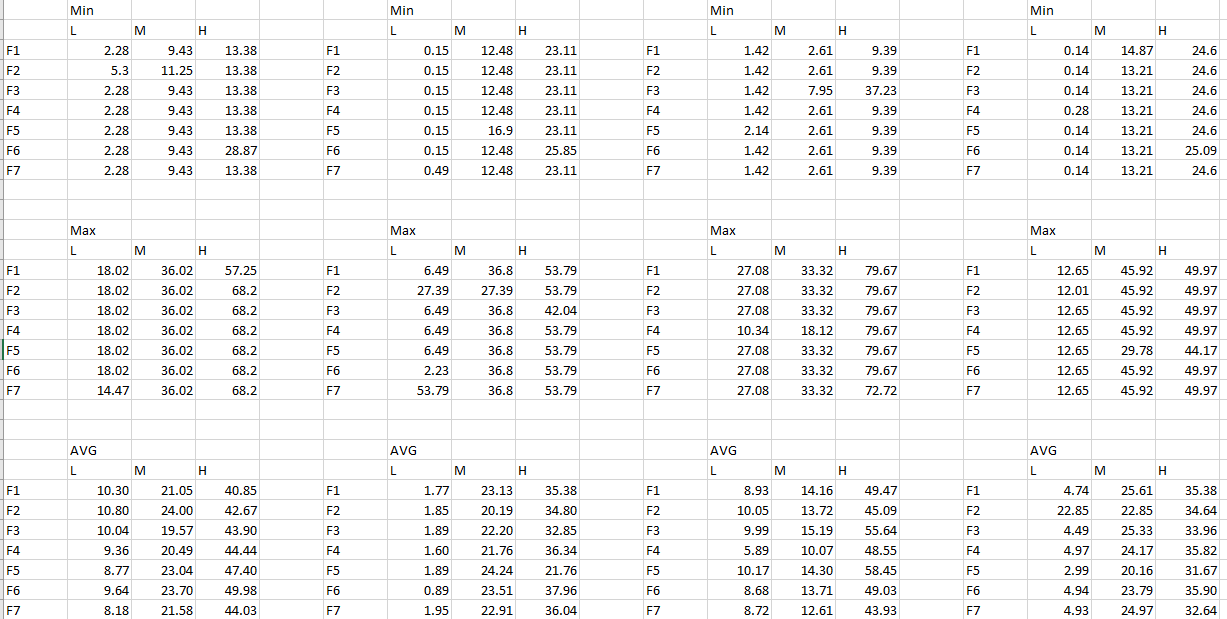

In [152]:
def get_dmg_F(eucli):
          if eucli[0] <2.28:
              print('N')
          elif  2.28 <= eucli[0] <= 9.43:
              print('L')
          elif 9.43 < eucli[0] <= 13.38:
              print('M')
          elif eucli[0] > 13.38:
               print('H')

In [153]:
def get_dmg_L(eucli):
          if eucli[0] <0.49:
              print('N')
          elif  0.49 <= eucli[0] <= 12.48:
              print('L')
          elif 12.48 < eucli[0] <= 23.11:
              print('M')
          elif eucli[0] > 23.11:
               print('H')

In [154]:
def get_dmg_B(eucli):
          if eucli[0] < 1.42:
              print('N')
          elif   1.42 <= eucli[0] <= 2.61:
              print('L')
          elif 2.61 < eucli[0] <= 9.39:
              print('M')
          elif eucli[0] > 9.39:
               print('H')

In [155]:
def get_dmg_R(eucli):
          if eucli[0] < 0.14:
              print('N')
          elif   0.14 <= eucli[0] <= 13.21:
              print('L')
          elif 13.21 < eucli[0] <= 24.6:
              print('M')
          elif eucli[0] > 24.6:
               print('H')

In [157]:
get_dmg_F(mdmg8)
get_dmg_L(mdmg8)
get_dmg_B(mdmg8)
get_dmg_R(mdmg8)

H
H
H
H
